In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_hierarchical_topic_model import (
    SimpleHierarchicalTopicModel,
    load_vocab,
    StoppingCondition,
    StatsSaver,
    explore_branching_factors,
)
from init_hierarchy_kmeans import KMeansInitializer
from param_stats import mean_dirichlet

In [3]:
from scipy.io import loadmat

In [4]:
np.random.seed(1)

In [5]:
print("Loading data...")
data = loadmat("/Users/aleverentz/Code/anchor-word-recovery/M_nips.full_docs.mat.trunc.mat")["M"]
#data = loadmat("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts.mat")["M"]
print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
print("Nonzero entries: {}".format(data.nnz))
print("Loading vocab...")
vocab = load_vocab("/Users/aleverentz/Code/anchor-word-recovery/vocab.nips.txt.trunc")
#vocab = load_vocab("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts_vocab.txt")
print("Vocab size = {}".format(len(vocab)))
assert data.shape[0] == len(vocab)

Loading data...
Vocab size: 2940
Num documents: 1500
Nonzero entries: 585933
Loading vocab...
Vocab size = 2940


In [6]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import text_utils

In [7]:
%%time

data, vocab = text_utils.xml_to_sparse_term_doc(
    filename = "/Users/aleverentz/Downloads/ap/ap_mod_xml.txt",
    within = ["toplevel"],
    eachdoc = ["DOC", "TEXT"],
    parser_type = "lxml-xml",
    tokenizer = text_utils.default_tokenizer)

print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
assert data.shape[0] == len(vocab)

Vocab size: 42756
Num documents: 2246
CPU times: user 29.6 s, sys: 226 ms, total: 29.8 s
Wall time: 30 s


In [8]:
branching_factors = [5]
paths = explore_branching_factors(branching_factors)

In [9]:
model = SimpleHierarchicalTopicModel(
    branching_factors = branching_factors,
    stopping_condition = StoppingCondition(max_epochs = 100),
    stats_saver = StatsSaver("./latest_stats_ap.txt"),
    initializer = KMeansInitializer(data = data, paths = paths, subset_size = 500, low = 0.01, high = 1.99),
    batch_size = None,
    save_params_history = True,
    vocab = vocab)

In [10]:
model.fit(data);

100%|██████████| 100/100 [15:35<00:00,  9.48s/it, Status=computing statistics]


In [11]:
top_words = model.get_top_words_by_node(num_words = 10)
model.print_top_words_by_node(num_words = 10);

Top words by node:
()  : the, of, in, a, to, and, said, 's, at, on
(0,): the, to, of, and, in, a, that, said, for, 's
(1,): galileo, uta, cdy, zero, stepping, clr, m, ferret, ranch, klan
(2,): the, of, in, and, to, a, said, was, were, on
(3,): israel, israeli, arab, occupied, palestinian, palestinians, shamir, gaza, u.n., territories
(4,): the, a, of, to, and, in, he, said, was, 's


In [12]:
init_topics = mean_dirichlet(model.stats_by_epoch[0]["var_params_DV"])

In [19]:
model.print_top_words_by_node(num_words = 10, topic_vectors = init_topics);

Top words by node:
()  : the, of, month-long, to, industrial, a, in, and, 600,000-member, guishan
(0,): journals, moshoeshoe, relievers, computerize, whereabouts, beers, 134.30, volume, pio, 2,046.0
(1,): 109, midnight, edt, 1829, parent-teacher, orleans-based, cheat, liza, swan, wiscnsin
(2,): o-ring, the, el-barajneh, replacements, wryly, shanghai, donating, subpoenaed, crew-shift, sentinel
(3,): to, the, african-american, loaner-vehicle, regiment, fmln, like, rainfall, bloated, half-hour
(4,): jokingly, geological, analysts, camaraderie, andronikos, 85|, videodisk, confiscated, payroll, hirsch


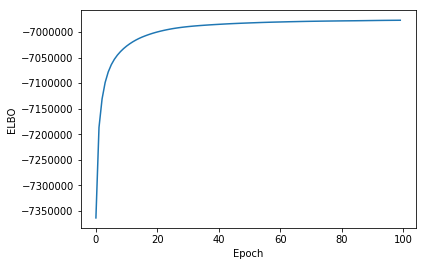

In [14]:
fig, ax = plt.subplots()
ax.plot(model.get_stats_by_epoch("epoch_index"), model.get_stats_by_epoch("ELBO"))
ax.set_xlabel("Epoch")
ax.set_ylabel("ELBO")
None

In [15]:
topic_vectors = model.get_expected_topic_vectors()

In [16]:
topic_vectors.shape

(6, 42756)

In [17]:
variance = topic_vectors.var(axis=0)
print(variance.shape)
np.linalg.norm(variance)

(42756,)


0.0010855455095286812

IndexError: index 6 is out of bounds for axis 0 with size 6

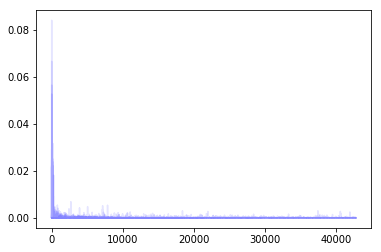

In [18]:
for i in range(10):
    plt.plot(topic_vectors[i,:], color='b', alpha=0.1);

In [ ]:
plt.plot(topic_vectors[0,:], color='b', alpha=0.2)
plt.plot(topic_vectors[1,:], color='g', alpha=0.2)
plt.plot(topic_vectors[0,:] - topic_vectors[1,:], color='r', alpha=0.5)
None